# Chapter 17. 서포트 벡터 머신

## 17.0 소개

## 17.1 선형 분류기 훈련하기

* 서포트 벡터 분류기(SVC)를 사용하여 클래스 사이에 마진을 최대화하는 초평면(hyperplane) 만들기

In [5]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100, :2]
target = iris.target[:100]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = LinearSVC(C=1.0)

model = svc.fit(features_standardized, target)

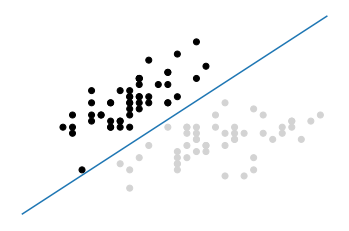

In [6]:
# 사이킷런의 LinearSVC로 간단한 SVC 구현
from matplotlib import pyplot as plt

color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c = color)

# 초 평면 제작
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [7]:
new_observation = [[-2, 3]]

svc.predict(new_observation)

array([0])

* SVC 언급
    * 그래프로 나타내기 쉽게 이진 분류를 했다.
        * 다중 클래스 환경에도 동작 가능
    * 초평면은 완전 선형이며, 곡선이 아니다.
        * 두 클래스를 완벽하게 구분하는 초평면이 있으나 실전에서는 매우 드물다.


In [8]:
svc.decision_function(new_observation)

array([-6.84224712])

## 17.2 커널을 사용해 선형적으로 구분되지 않는 클래스 다루기
* 비선형 결정 경계를 만들고자 커널 함수를 사용한 서포트 벡터 머신 훈련

In [11]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0)

# 두 개의 특성 제작
features = np.random.randn(200,2)

# XOR 연산 사용하여, 선형적으로 구분 불가능한 클래스 제작
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# 방사 기저 함수 커널을 사용한 서포트 벡터 머신 제작
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# 분류기 훈련
model =svc.fit(features, target)

$$f(x) = \beta_0 + \sum_{i\in S}\alpha_i K (x_i, x_{i'})$$

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, alpha=0.1, cmap=cmap)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap.colors[idx],
        marker="+", label=cl)

In [14]:
svc_linear = SVC(kernel="linear", random_state=0, C=1)

svc_linear.fit(features, target)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

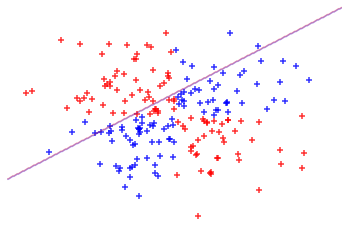

((-3.0, 2.9800000000000058, -3.0, 2.9800000000000058), None)

In [15]:
# 특성이 두 개이므로 2차원 공간이고 초평면을 그릴 수 있다. 샘플도 그릴 수 있다.
plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off"), plt.show()

In [16]:
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

model = svc.fit(features, target)

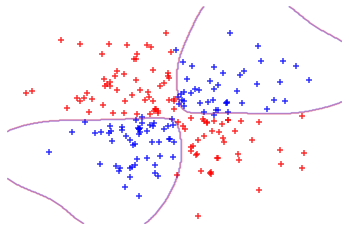

((-3.0, 2.9800000000000058, -3.0, 2.9800000000000058), None)

In [17]:
# 선형 커널을 방사 기저 함수 커널로 변경 후 새로운 모델 훈련 후 샘플과 초평면 그리기
plot_decision_regions(features, target, classifier=svc)
plt.axis("off"), plt.show()

* 이 외에도 하이퍼볼릭 탄젠트 함수를 사용하는 sigmoid 커널이 있다.

$$K(x_i, x'_i) = \tanh \left(\gamma \sum_{j=1}^p x_{ij}x'_{ij} + r \right)$$

* coef0 매개변수는 다항 커널과 시그모이드 커널의 r에 해당합니다.

## 17.3 예측 확률 계산하기

* probability=True로 지정하여 모델 훈련하면, predict_proba 메서드에서 보정된 확률 확인 가능하다.

In [21]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 로드
iris = datasets.load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 서포트 벡터 분류기 제작
svc = SVC(kernel="linear", probability=True, random_state=0)

model = svc.fit(features_standardized, target)

# 새로운 샘플 제작
new_observation = [[.4,.4,.4,.4]]

# 예측 확률 확인
model.predict_proba(new_observation)

array([[0.00582525, 0.96725691, 0.02691783]])

## 17.4 서포트 벡터 식별하기

In [23]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[:100, :]
target = iris.target[:100]

# 특성을 표준화하기
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# 서포트 벡터 분류기 제작. object
svc = SVC(kernel="linear", random_state=0)

model = svc.fit(features_standardized, target)

model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

* 초평면이 비교적 소수의 샘플에 의해 결정된다는 사실에서 이름이 유래 했다.
    * 이러한 샘플이 서포트 벡터라고 한다.
    * 서포트 벡터는 초평면을 받들고 있고, 모델에서 아주 중요하다.
    * 서포트 벡터를 삭제하면, 초평면이 만드는 최대 마진이 달라진다.

In [25]:
model.support_

array([23, 41, 57, 98])

In [26]:
# 각 클래스에 속한 서포트 벡터의 수를 확인한다.
model.n_support_

array([2, 2])

## 17.5 불균형한 클래스 다루기
* class_weight : 작은 클래스를 잘못 분류했을 때 패널티 증가시키기

In [28]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
features = iris.data[40:, :]
target = iris.target[:100]

features = features_standardized[40:, :]
target = target[40:]

# 타깃 벡터에서 0 아닌 클래스 모두 1로 만든다
target = np.where((target == 0), 0, 1)

# 특성 표준화
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)

model = svc.fit(features_standardized, target)

* C : 서포트 벡터 머신에서 샘플의 분류 오차에 대한 패널티 결정하는 하이퍼파라미터 입니다.
    * 분류 오차에 대한 패널티로, 소수 클래스를 잘못 분류하는 데 패널티를 증가시켜서 다수 패널티의 횡포를 막는다.
    * 'balanced'로 지정하면 자동으로 클래스를 가중합니다.